# Install and import dependencies

In [26]:
%pip install --user tensorflow==2.5.0 tensorflow-gpu==2.5.0 tensorflow-hub opencv-python matplotlib 


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\jords\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [27]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import argparse
#from google.colab.patches import cv2_imshow
import time



KeyboardInterrupt: 

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
   tf.config.experimental.set_memory_growth(gpu, True)
    

# Load Model

In [ ]:
#model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
model = tf.saved_model.load(r'C:\Users\jords\Documents\University of Essex Year 3\movenet_multipose_lightning_1')
movenet = model.signatures['serving_default']

# Make Detections

In [ ]:
Vid=input('Enter Video file: ')
cap = cv2.VideoCapture(Vid)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 384,600)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    # Render keypoints 
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.1)
    
    #court lines
    def detect_lines(frame)
    
    #FPS Counter
    pTime = 0
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    cv2.putText(frame, str(int(fps)), (70,50), cv2.FONT_HERSHEY_PLAIN, 3, 
    (255,0,0), 3)
    
    cv2.imshow('MoveNet Tracking',frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

SyntaxError: invalid syntax (4118740736.py, line 19)

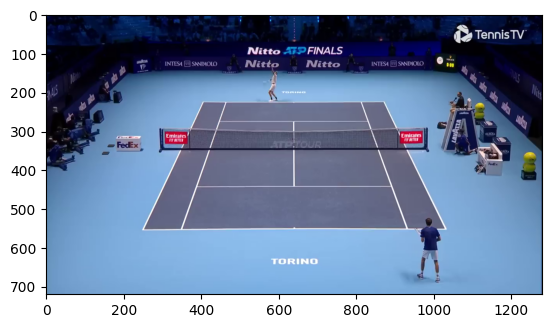

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
print(cv2.__version__)

4.7.0


In [ ]:
32*12

384

In [ ]:
# Function to loop through each person detected and render
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

# Draw Keypoints


In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 3, (0,255,0), -1)

#Draw Edges

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

# Court detection 

In [39]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("Tennis.PNG")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to remove noise
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY)[1]

# Apply morphological operations to remove small holes
kernel = np.ones((1, 1), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    
    # Ignore small contours that are likely noise
    if area < 50:
        continue
    
    # Draw the contour on the original image
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
# Show the image with the detected contours
cv2.imshow("Image", image)
cv2.waitKey(0)


-1

In [40]:
def detect_lines(frame):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to remove noise
    thresh = cv2.threshold(gray, 165, 250, cv2.THRESH_BINARY)[1]

    # Apply morphological operations to remove small holes
    kernel = np.ones((1, 1), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)

        # Ignore small contours that are likely noise
        if area < 1000:
            continue

        # Draw the contour on the original image
        cv2.drawContours(frame, [contour], -1, (0, 255, 0), 2)

In [42]:
import cv2
import numpy as np

# Open the video file or camera stream
cap = cv2.VideoCapture('SinglesB.mp4')

# Loop over the frames
while True:
    # Read a frame from the video file or camera stream
    ret, frame = cap.read()
    
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to remove noise
    thresh = cv2.threshold(gray, 165, 250, cv2.THRESH_BINARY)[1]

    # Apply morphological operations to remove small holes
    kernel = np.ones((1, 1), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)

        # Ignore small contours that are likely noise
        if area < 1000:
            continue

        # Draw the contour on the original image
        cv2.drawContours(frame, [contour], -1, (0, 255, 0), 2)
    
    # Define the corners of the tennis court in the input image
    court_corners = np.array([[383, 149], [1098, 153], [1009, 660], [425, 656]], dtype=np.float32)
    # Define the size of the output image
    court_size = (400, 600)

# Define the corners of the tennis court in the output image (top-down view)
    court_topdown = np.array([[0, 0], [court_size[0], 0], [court_size[0], court_size[1]], [0, court_size[1]]], dtype=np.float32)

# Calculate the transformation matrix
    M = cv2.getPerspectiveTransform(court_corners, court_topdown)

# Apply perspective transformation to the image
    warped = cv2.warpPerspective(frame, M, court_size)

    # Show the image with the detected contours
    cv2.imshow("Frame", frame)
    # Show the transformed image in a top-down view
    cv2.imshow("Warped", warped)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break


# Release the video file or camera stream and close all windows
cap.release()

cv2.destroyAllWindows()


In [43]:
import cv2
import numpy as np

# Read the image
image = cv2.imread("Tennis.png")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to remove noise
thresh = cv2.threshold(gray, 165, 250, cv2.THRESH_BINARY)[1]

# Apply morphological operations to remove small holes
kernel = np.ones((1, 1), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Ignore small contours that are likely noise
    if area < 1000:
        continue

    # Draw the contour on the original image
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Show the image with the detected contours
cv2.imshow("Image", image)

# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("track.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 100, 200)

# Apply Hough transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Draw the lines on the image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Define the corners of the tennis court in the input image
court_corners = np.array([[383, 149], [1098, 153], [1009, 660], [425, 656]], dtype=np.float32)

# Define the size of the output image
court_size = (400, 600)

# Define the corners of the tennis court in the output image (top-down view)
court_topdown = np.array([[0, 0], [court_size[0], 0], [court_size[0], court_size[1]], [0, court_size[1]]], dtype=np.float32)

# Calculate the transformation matrix
M = cv2.getPerspectiveTransform(court_corners, court_topdown)

# Apply perspective transformation to the image
warped = cv2.warpPerspective(img, M, court_size)

# Show the original image with the detected lines
cv2.imshow("Original", img)

# Show the transformed image in a top-down view
cv2.imshow("Warped", warped)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [45]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("track.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 100, 200)

# Define the minimum and maximum line length for the Hough transform
minLineLength = 400
maxLineGap = 100

# Apply Hough transform to detect lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=minLineLength, maxLineGap=maxLineGap)

# Draw the lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Define the corners of the tennis court in the input image
court_corners = np.array([[383, 149], [1098, 153], [1009, 660], [425, 656]], dtype=np.float32)

# Define the size of the output image
court_size = (400, 600)

# Define the corners of the tennis court in the output image (top-down view)
court_topdown = np.array([[0, 0], [court_size[0], 0], [court_size[0], court_size[1]], [0, court_size[1]]], dtype=np.float32)

# Calculate the transformation matrix
M = cv2.getPerspectiveTransform(court_corners, court_topdown)

# Apply perspective transformation to the image
warped = cv2.warpPerspective(img, M, court_size)

# Show the original image with the detected lines
cv2.imshow("Original", img)

# Show the transformed image in a top-down view
cv2.imshow("Warped", warped)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [53]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("Tennis.PNG")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Apply Hough transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Draw the lines on the image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show the image with the detected lines
cv2.imshow("Image", image)
cv2.waitKey(0)


113

In [52]:
import cv2
import numpy as np

# Open the video file or camera stream
cap = cv2.VideoCapture('SinglesB.mp4')

# Loop over the frames
while True:
    # Read a frame from the video file or camera stream
    ret, frame = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Apply Hough transform to detect lines in the image
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    # Filter the lines to keep only those that are likely to represent the court lines
    filtered_lines = []
    for line in lines:
        rho, theta = line[0]
        angle = np.abs(theta * 180 / np.pi - 90)
        if angle < 20 or angle > 70:
            continue
        if rho < 150 or rho > 450:
            continue
        filtered_lines.append(line)

    # Draw the filtered lines on the original image
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show the image with the detected lines
    cv2.imshow("Frame", frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

# Release the video file or camera stream and close all windows
cap.release()
cv2.destroyAllWindows()


In [51]:
import cv2
import numpy as np

# Open the video file or camera stream
cap = cv2.VideoCapture('SinglesB.mp4')

# Loop over the frames
while True:
    # Read a frame from the video file or camera stream
    ret, frame = cap.read()
    
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to remove noise
    thresh = cv2.threshold(gray, 165, 250, cv2.THRESH_BINARY)[1]

    # Apply morphological operations to remove small holes
    kernel = np.ones((1, 1), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Apply Canny edge detection to find edges
    edges = cv2.Canny(closed, 50, 150, apertureSize=3)

    # Apply Hough transform to detect straight lines
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

    # Draw the detected lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show the image with the detected lines
    cv2.imshow("Frame", frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

# Release the video file or camera stream and close all windows
cap.release()

cv2.destroyAllWindows()
